In [2]:
import sys
sys.path.insert(0,'/home/marc.penuliar/bilby') 
import bilby
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

No version information file '.version' found


In [3]:
#Carls_Bilby_Example_Code. Put these into the renaming 
result_1 = bilby.result.read_in_result(filename='lambdatilde_deltalambdatilde/outdir/bns_example_result.json') #Bilby_Example_Code_Carls_Import

#lambdaSymm_lambdaASymm
result_2 = bilby.result.read_in_result(filename='lambdaSymm_lambdaASymm/outdir/lambdaSymm_lambdaASymm_result.json') #lambdaSymm_lambdaASymm

#BinaryLove_lambdaSymm
result_3 = bilby.result.read_in_result(filename='binary_love_Symm/outdir/BinaryLove_lambdaSymm_result.json') #Binary_love_Symm

#No need to have the renaming. This is the original
result_4 = bilby.result.read_in_result(filename='Original_Example/outdir/bns_example_result.json') #Orignial_Bilby_Example_Code

In [28]:
# print(result_3.injection_parameters['lambda_2'])

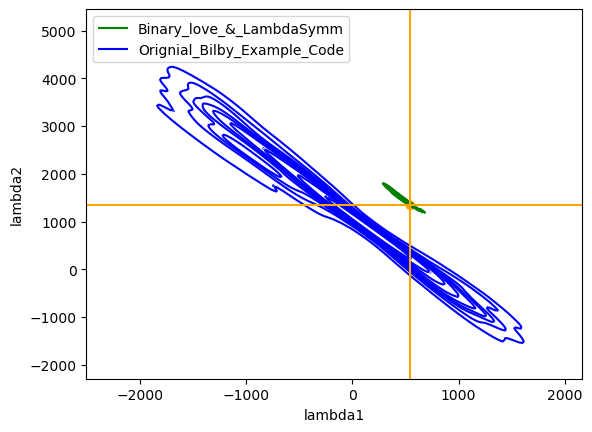

In [46]:
sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'],color = 'blue')#, label='Carls_Bilby_Example_Code')
# sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r')#, label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green')#, label='Binary_love_&_LambdaSymm')

# sns.kdeplot( x=result_4.posterior['lambda_1'], y=result_4.posterior['lambda_2'],color = 'purple')#, label='Orignial_Bilby_Example_Code')

#lambda 2 y
plt.axhline(y=result_3.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_3.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_3.injection_parameters['lambda_1'], result_3.injection_parameters['lambda_2'],color = 'orange')

plt.rcParams['figure.dpi'] = 100 #This is used to make the graph bigger

import matplotlib.lines as mlines

# plt.legend()
blue_line = mlines.Line2D(result_1.posterior['lambda_1'], result_1.posterior['lambda_2'], color='blue', label='Orignial_Bilby_Example_Code')
red_line = mlines.Line2D(result_2.posterior['lambda_1'], result_2.posterior['lambda_2'], color='red', label='LambdaSymm_&_LambdaAsymm')
green_line = mlines.Line2D(result_3.posterior['lambda_1'], result_3.posterior['lambda_2'], color='green', label='Binary_love_&_LambdaSymm')
plt.legend(handles=[green_line,blue_line])
plt.show()

In [37]:
import seaborn as sns 

#Results 1 uses the setting -5000 to 5000 for delta lambda instead of using -500 to 1000. That change is in result_4
 # priors["delta_lambda"] = bilby.core.prior.Uniform(-500, 1000, name="delta_lambda")

##############Bilby Example This example is done with having 
result_1.posterior['lambda1'] = result_1.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_tilde_delta_lambda_tilde_to_lambda_1_lambda_2(
                row['lambda_tilde'],row['delta_lambda'],row['mass_1'],row['mass_2']
                )[0], axis = 1)
result_1.posterior['lambda2'] = result_1.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_tilde_delta_lambda_tilde_to_lambda_1_lambda_2(
                row['lambda_tilde'],row['delta_lambda'],row['mass_1'],row['mass_2']
                )[1], axis = 1)

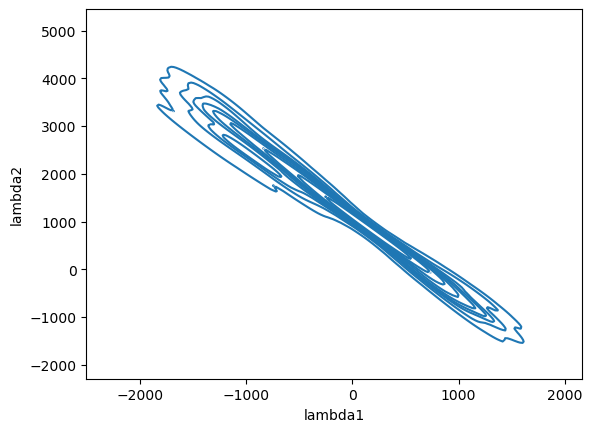

In [43]:
sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'])
plt.rcParams['figure.dpi'] = 100

In [ ]:
##############LSymm LAsymm
result_2.posterior['lambda1'] = result_2.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(
                row['lambda_symmetric'],row['lambda_antisymmetric']
                )[0], axis = 1)

result_2.posterior['lambda2'] = result_2.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(
                row['lambda_symmetric'],row['lambda_antisymmetric']
                )[1], axis = 1)

In [ ]:
sns.kdeplot( x=result_2.posterior['lambda1'], y=result_2.posterior['lambda2'])


In [ ]:
##############B LSymm
result_3.posterior['lambda1'] = result_3.posterior.apply(lambda row :
        bilby.gw.conversion.binary_love_lambda_symmetric_to_lambda_1_lambda_2_manual_marginalisation(
                row['binary_love_uniform'],row['lambda_symmetric'],row['symmetric_mass_ratio']
                )[0], axis = 1)

result_3.posterior['lambda2'] = result_3.posterior.apply(lambda row :
        bilby.gw.conversion.binary_love_lambda_symmetric_to_lambda_1_lambda_2_manual_marginalisation(
                row['binary_love_uniform'],row['lambda_symmetric'],row['symmetric_mass_ratio']
                )[1], axis = 1)

In [ ]:
sns.kdeplot( x=result_3.posterior['lambda1'], y=result_3.posterior['lambda2'])

In [ ]:
##############Bilby Example
result_4.posterior['lambda1'] = result_4.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_tilde_delta_lambda_tilde_to_lambda_1_lambda_2(
                row['lambda_tilde'],row['delta_lambda'],row['mass_1'],row['mass_2']
                )[0], axis = 1)

result_4.posterior['lambda2'] = result_4.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_tilde_delta_lambda_tilde_to_lambda_1_lambda_2(
                row['lambda_tilde'],row['delta_lambda'],row['mass_1'],row['mass_2']
                )[1], axis = 1)

# sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'])

In [ ]:
sns.kdeplot( x=result_4.posterior['lambda1'], y=result_4.posterior['lambda2'])

In [ ]:
# sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'],color = 'blue', label='Carls_Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda1'], y=result_2.posterior['lambda2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda1'], y=result_3.posterior['lambda2'],color = 'green', label='Binary_love_&_LambdaSymm')
sns.kdeplot( x=result_4.posterior['lambda1'], y=result_4.posterior['lambda2'],color = 'purple', label='Orignial_Bilby_Example_Code')
plt.legend()

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'black')


# plt.rcParams['figure.dpi'] = 500

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')

plt.show()

In [ ]:
# sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'],color = 'blue', label='Carls_Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda1'], y=result_2.posterior['lambda2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda1'], y=result_3.posterior['lambda2'],color = 'green', label='Binary_love_&_LambdaSymm')
# sns.kdeplot( x=result_4.posterior['lambda1'], y=result_4.posterior['lambda2'],color = 'purple', label='Orignial_Bilby_Example_Code')

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'black')


# plt.rcParams['figure.dpi'] = 500

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')

plt.legend()
plt.show()

In [ ]:
# sns.kdeplot( x=result_1.posterior['lambda1'], y=result_1.posterior['lambda2'],color = 'blue', label='Carls_Bilby_Example_Code')
# sns.kdeplot( x=result_2.posterior['lambda1'], y=result_2.posterior['lambda2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda1'], y=result_3.posterior['lambda2'],color = 'green', label='Binary_love_&_LambdaSymm')
# sns.kdeplot( x=results_4.posterior['lambda1'], y=results_4.posterior['lambda2'],color = 'purple', label='Orignial_Bilby_Example_Code')


###
#Taken from macro-SLY_LAL.csv 
#I manually took the vaules from the files from an excel sheet. Going to see if the value matches with KDE plot then 
    #ill get impor the correct values using pandas. 
lambda_1=182.367432516109 
lambda_2=475.686331754533 


#lambda 2 y
plt.axhline(y= lambda_2 , color="orange", linestyle="-")
#lambda 1 x
plt.axvline(x= lambda_1, color="orange")
#Add the point
plt.scatter(lambda_1, lambda_2, color = 'orange')


###
#lambda 2 y
# plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
# #lambda 2 x
# plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
# #Add the point
# plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')

# plt.rcParams['figure.dpi'] = 500
plt.legend()
plt.show()

In [ ]:
sns.kdeplot( x=result_4.posterior['lambda1'], y=result_4.posterior['lambda2'],color = 'purple', label='Orignial_Bilby_Example_Code')


#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')



In [ ]:
print(result_1.injection_parameters['lambda_1']) 

In [ ]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')

# plt.rcParams['figure.dpi'] = 300

plt.legend()
plt.show()

In [ ]:
# sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
# sns.kdeplot( x=results_4.posterior['lambda_1'], y=results_4.posterior['lambda_2'],color = 'purple', label='Orignial_Bilby_Example_Code')

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'black')


plt.rcParams['figure.dpi'] = 200


plt.legend()
plt.show()

In [ ]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
# sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
# sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
plt.legend()
plt.show()

In [ ]:
# sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
# sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
plt.legend()
plt.show()

In [ ]:
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
